In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# Optional: display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


In [3]:
DATA_PATH = "data.csv"   # change if needed
df = pd.read_csv(DATA_PATH)

# Quick look
print(df.shape)
display(df.head())
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Columns:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_s

In [5]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])
# drop unnamed columns of NaNs if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# map diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# confirm
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Optional: list of features
print("Number of features:", X.shape[1])
display(X.columns)

Number of features: 30


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (455, 30) Test shape: (114, 30)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [15]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# coefficients and intercept
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_.ravel()})
coef_df = coef_df.sort_values(by='coefficient', key=abs, ascending=False)
display(coef_df.head(10))
print("Intercept:", model.intercept_)

,feature,coefficient
21,texture_worst,1.423806
10,radius_se,1.243632
28,symmetry_worst,1.059102
7,concave points_mean,0.954814
13,area_se,0.933406
23,area_worst,0.924092
15,compactness_se,-0.915840
26,concavity_worst,0.910627
20,radius_worst,0.896585
6,concavity_mean,0.790535


Intercept: [-0.19590758]


In [17]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-score: 0.9639
ROC AUC: 0.996


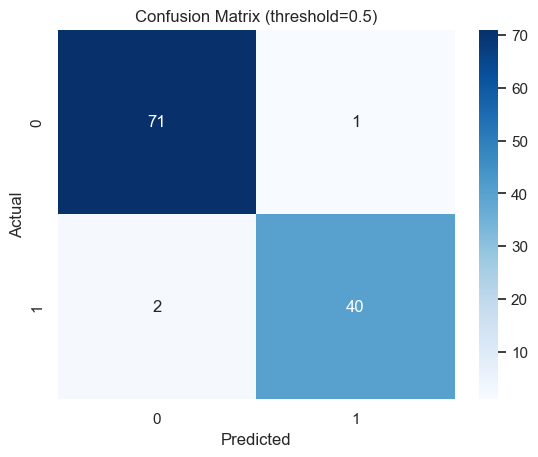


Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))

# Confusion matrix & classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (threshold=0.5)')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))


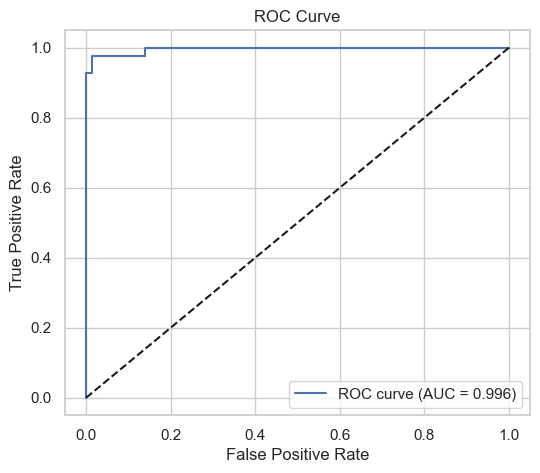

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [23]:
youden_j = tpr - fpr
opt_idx = np.argmax(youden_j)
opt_threshold = thresholds[opt_idx]
print("Optimal threshold by Youden's J:", round(opt_threshold, 3))

y_pred_opt = (y_proba >= opt_threshold).astype(int)
print("Accuracy (opt):", round(accuracy_score(y_test, y_pred_opt), 4))
print("Precision (opt):", round(precision_score(y_test, y_pred_opt), 4))
print("Recall (opt):", round(recall_score(y_test, y_pred_opt), 4))
print("F1 (opt):", round(f1_score(y_test, y_pred_opt), 4))

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_proba)

pr_df = pd.DataFrame({
    'threshold': np.append(pr_thresholds, 1.0),
    'precision': np.append(precisions[:-1], precisions[-1]),
    'recall': np.append(recalls[:-1], recalls[-1])
})
display(pr_df.sort_values(by='threshold', ascending=False).head(8))


Optimal threshold by Youden's J: 0.321
Accuracy (opt): 0.9825
Precision (opt): 0.9762
Recall (opt): 0.9762
F1 (opt): 0.9762


,threshold,precision,recall
114,1.0,1.0,0.000000
113,1.0,1.0,0.023810
112,1.0,1.0,0.047619
111,1.0,1.0,0.071429
110,1.0,1.0,0.095238
109,1.0,1.0,0.119048
108,1.0,1.0,0.142857
107,1.0,1.0,0.166667


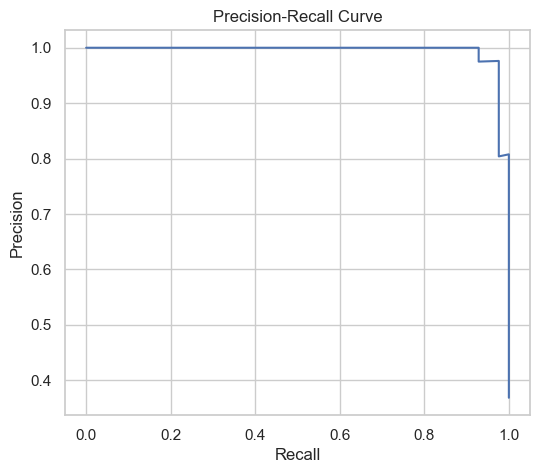

In [25]:
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label="Precision-Recall curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


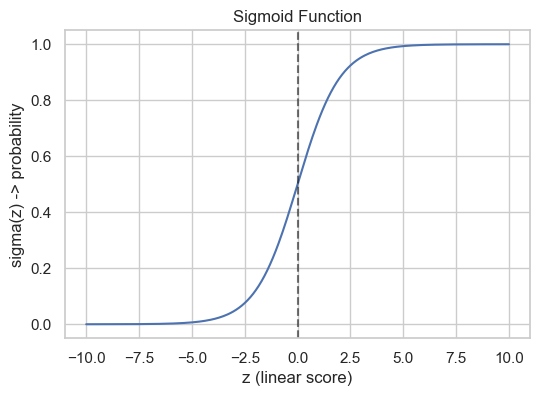

Max abs diff between computed sigmoid(prob) and predict_proba: 0.0


In [29]:
z = np.linspace(-10, 10, 300)
sig = 1 / (1 + np.exp(-z))
plt.figure(figsize=(6,4))
plt.plot(z, sig)
plt.axvline(0, color='k', linestyle='--', alpha=0.6)
plt.title("Sigmoid Function")
plt.xlabel("z (linear score)")
plt.ylabel("sigma(z) -> probability")
plt.grid(True)
plt.show()

linear_scores = model.decision_function(X_test_scaled)   
prob_from_scores = 1 / (1 + np.exp(-linear_scores))

print("Max abs diff between computed sigmoid(prob) and predict_proba:", np.max(np.abs(prob_from_scores - y_proba)))
